<body>
<h2>Project 5: Bias Variance Trade-Off</h2>

<!--announcements-->
<blockquote>
    <center>
    <a href="http://blogs.worldbank.org/publicsphere/files/publicsphere/biased_processing.jpg"><img src="bias.jpg" width="600px" /></a>
    </center>
      <p><cite><center>"All of us show bias when it comes to what information we take in.<br>We typically focus on anything that agrees with the outcome we want."<br>
<b>--Noreena Hertz</b>
      </center></cite></p>
</blockquote>
<h3>Introduction</h3>

<p>
Recall that the squared error can be decomposed into <em>bias</em>, <em>variance</em> and <em>noise</em>: 
$$
    \underbrace{\mathbb{E}[(h_D(x) - y)^2]}_\mathrm{Error} = \underbrace{\mathbb{E}[(h_D(x)-\bar{h}(x))^2]}_\mathrm{Variance} + \underbrace{\mathbb{E}[(\bar{h}(x)-\bar{y}(x))^2]}_\mathrm{Bias} + \underbrace{\mathbb{E}[(\bar{y}(x)-y(x))^2]}_\mathrm{Noise}\nonumber
$$
We will now create a data set for which we can approximately compute this decomposition. 
The function <em><strong>`toydata`</strong></em> generates a binary data set with class $1$ and $2$. Both are sampled from Gaussian distributions:
$$
p(\vec x|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\vec x|y=2)\sim {\mathcal{N}}(\mu_2,{I}),
$$

where $\mu_2=[2;2]^\top$ (the global variable <em>OFFSET</em> $\!=\!2$ regulates these values: $\mu_2=[$<em>OFFSET</em> $;$ <em>OFFSET</em>$]^\top$).
</p>

<h3>Computing noise, bias and variance</h3>
<p>
You will need to edit four functions:  <em><strong>`computeybar`</strong></em>,  <em><strong>`computehbar`</strong></em>, and <em><strong>`computevariance`</strong></em>. First take a look at <strong>`biasvariancedemo`</strong> and make sure you understand where each function should be called and how they contribute to the Bias/Variance/Noise decomposition. <br/><br/>
</p>

**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [1]:
#<GRADED>
import numpy as np
from numpy.matlib import repmat
#</GRADED>

In [2]:
import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import sys
from scipy.io import loadmat
import time

%matplotlib inline

**`l2distance` Helper Function**: `l2distance` is a helper function used in our implementation of the ridge regression.

In [3]:
#<GRADED>

In [4]:
def l2distance(X, Z=None):
    """
    function D=l2distance(X,Z)

    Computes the Euclidean distance matrix.
    Syntax:
    D=l2distance(X,Z)
    Input:
    X: dxn data matrix with n vectors (columns) of dimensionality d
    Z: dxm data matrix with m vectors (columns) of dimensionality d

    Output:
    Matrix D of size nxm
    D(i,j) is the Euclidean distance of X(:,i) and Z(:,j)

    call with only one input:
    l2distance(X)=l2distance(X,X)
    """
    if Z is None:
        n, d = X.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)
        D1 = -2 * np.dot(X, X.T) + repmat(s1, 1, n)
        D = D1 + repmat(s1.T, n, 1)
        np.fill_diagonal(D, 0)
        D = np.sqrt(np.maximum(D, 0))
    else:
        n, d = X.shape
        m, _ = Z.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)
        s2 = np.sum(np.power(Z, 2), axis=1).reshape(1,-1)
        D1 = -2 * np.dot(X, Z.T) + repmat(s1, 1, m)
        D = D1 + repmat(s2, n, 1)
        D = np.sqrt(np.maximum(D, 0))
    return D


In [5]:
#</GRADED>

**`toydata` Helper Function**: `toydata` is a helper function used to generate the the binary data with n/2 values in class 1 and n/2 values in class 2. With class 1 being the label for data drawn from a normal distribution having mean 0 and sigma 1. And clss 2 being the label for data drawn from a normal distribution with mean OFFSET and sigma 1.

In [6]:
#<GRADED>

In [7]:
def toydata(OFFSET,N):
    """
    function [x,y]=toydata(OFFSET,N)
    
    This function constructs a binary data set. 
    Each class is distributed by a standard Gaussian distribution.
    INPUT: 
    OFFSET:  Class 1 has mean 0,  Class 2 has mean 0+OFFSET (in each dimension). 
    N: The function returns N data points ceil(N/2) are of class 2, the rest
    of class 1
    """
    
    NHALF = int(np.ceil(N/2))
    x = np.random.randn(N, 2)
    x[NHALF:, :] += OFFSET  
    
    y = np.ones(N)
    y[NHALF:] *= 2
    
    jj = np.random.permutation(N)
    return x[jj, :], y[jj]

In [8]:
#</GRADED>

<p>
(a) <strong>Noise:</strong> First we focus on the noise. For this, you need to compute $\bar y(\vec x)$ in  <em><strong>`computeybar`</strong></em>. You can compute the probability $p(\vec x|y)$ with the equations $p(\vec x|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\vec x|y=2)\sim {\mathcal{N}}(\mu_2,{I})$. Then use Bayes rule to compute $p(y|\vec x)$. <br/><br/>
<strong>Note:</strong> You may want to use the function <em>`normpdf`</em>, which is defined for  you in <em><strong>`computeybar`</strong></em>.
<br/><br/></p>


In [9]:
#<GRADED>

In [10]:
def computeybar(xTe, OFFSET):
    """
    function [ybar]=computeybar(xTe, OFFSET);

    computes the expected label 'ybar' for a set of inputs x
    generated from two standard Normal distributions (one offset by OFFSET in
    both dimensions.)

    INPUT:
    xTe : nx2 array of n vectors with 2 dimensions
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.

    OUTPUT:
    ybar : a nx1 vector of the expected labels for vectors xTe
    """
    n,temp = xTe.shape
    ybar = np.zeros(n)
    
    # Feel free to use the following function to compute p(x|y), or not
    # normal distribution is default mu = 0, sigma = 1.
    normpdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    ## fill in code here
    #raise NotImplementedError('Your code goes here!')
    for i in range(n):
        if (normpdf(xTe[i][0],0,1) * normpdf(xTe[i][1],0,1)) > (normpdf(xTe[i][0],OFFSET,1) * normpdf(xTe[i][1],OFFSET,1)):
            ybar[i] = 1
        else:
            ybar[i] = 2
            
    return ybar

In [11]:
#</GRADED>

**Visualizing the Data**:
You can now see the error of the bayes classifier. Below is a plotting of the two classes of points and the misclassified points.

Error of Bayes classifier: 7.6%.


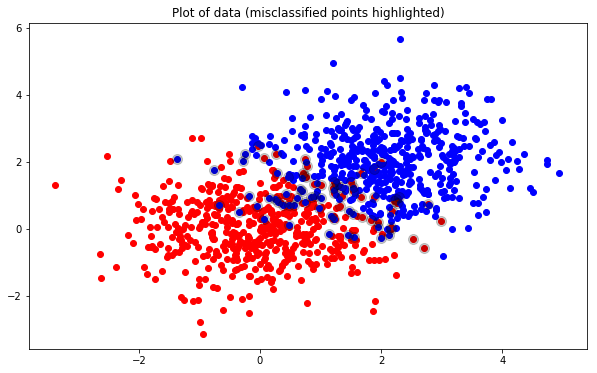

In [12]:
OFFSET = 2
xTe, yTe = toydata(OFFSET, 1000)

# compute Bayes Error
ybar = computeybar(xTe, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTe
err = errors.sum() / len(yTe) * 100
print('Error of Bayes classifier: %.1f%%.' % err)

# plot data
i1 = yTe == 1
i2 = yTe == 2
plt.figure(figsize=(10,6))
plt.scatter(xTe[i1, 0], xTe[i1, 1], c='r', marker='o')
plt.scatter(xTe[i2, 0], xTe[i2, 1], c='b', marker='o')
plt.scatter(xTe[errors, 0], xTe[errors, 1], c='k', s=100, alpha=0.2)
plt.title("Plot of data (misclassified points highlighted)")
plt.show()

<p>With the help of <strong>`computeybar`</strong> you can now compute the "noise" variable within <strong>`biasvariancedemo`</strong>. </p>

**`kregression` Helper Function**: 
<br/>
<strong>Important</strong> - $h_D$ is defined for you in <em><strong>`kregression`</strong></em>. It's kernelized ridge regression with kernel width $\sigma$ and regularization constant $\lambda$.
<br/><br/>

In [13]:
#<GRADED>

In [14]:
def kregression(xTr,yTr,sigma=0.1,lmbda=0.01):
    """
    function kregression(xTr,yTr,sigma,lmbda)
    
    Input:
    xTr | training data (nx2)
    yTr | training labels (nx1)
    sigma | kernel width (>0)
    lmbda | regularization constant (>0)
    
    Output:
    fun | usage: predictions=fun(xTe);
    """
    kernel = lambda x, z: np.power(1+(np.power(l2distance(x,z),2) / (2 * np.power(sigma,2))),-4)
    ridge = lambda K, lmbda2: K + lmbda * np.eye(K.shape[0], K.shape[1])
    beta = np.linalg.solve(ridge(kernel(xTr, xTr), lmbda), yTr)
    
    fun = lambda Xt: np.dot(kernel(Xt, xTr), beta)
    return fun

In [15]:
#</GRADED>

<p>
(b) <strong>Bias:</strong> For the bias, you will need $\bar{h}$. Although we cannot compute the expected value  $\bar h\!=\!\mathbb{E}[h]$, we can approximate it by training many $h_D$ and averaging their predictions. Edit the file <em><strong>`computehbar`</strong></em>. Average over <em>NMODELS</em> different $h_D$, each trained on a different data set of <em>Nsmall</em> inputs drawn from the same distribution. Feel free to call <em><strong>`toydata`</strong></em> to obtain more data sets. <br/><br/>
</p>

In [16]:
#<GRADED>

In [17]:
def computehbar(xTe, sigma, lmbda, Nsmall, NMODELS, OFFSET):
    """
    function [hbar]=computehbar(xTe, sigma, lmbda, NSmall, NMODELS, OFFSET);

    computes the expected prediction of the average classifier (hbar)
    for data set xTe. 

    The training data of size Nsmall is drawn from toydata with OFFSET 
    with kernel regression with sigma and lmbda

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       | nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    sigma     | kernel width of the RBF kernel
    lmbda     | regularization constant
    NSmall    | Number of points to subsample
    NMODELS   | Number of Models to average over
    OFFSET    | The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    OUTPUT:
    hbar | nx1 vector with the predictions of hbar for each test input
    """
    n = xTe.shape[0]
    hbar = np.zeros(n)
    for j in range(NMODELS):
        ## fill in code here
        #raise NotImplementedError('Your code goes here!')
        xTr, yTr = toydata(OFFSET, Nsmall)
        fun = kregression(xTr, yTr, sigma, lmbda)
        hd = fun(xTe)
        hbar += hd
    hbar /= NMODELS
    return hbar

In [18]:
#</GRADED>

<p>With the help of <strong>`computehbar`</strong> you can now compute the "bias" variable within <strong>`biasvariancedemo`</strong>. </p>


<p>(c) <strong>Variance:</strong> Finally, to compute the variance, we need to compute the term $\mathbb{E}[(h_D-\bar{h})^2]$. Once again, we can approximate this term by averaging over  <em>NMODELS</em> models. Edit the file <em><strong>`computevariance`</strong></em>. 
<br/></br></p>

In [19]:
#<GRADED>

In [20]:
def computevariance(xTe, sigma, lmbda, hbar, Nsmall, NMODELS, OFFSET):
    """
    function variance=computevariance(xTe,sigma,lmbda,hbar,Nsmall,NMODELS,OFFSET)

    computes the variance of classifiers trained on data sets from
    toydata.m with pre-specified "OFFSET" and 
    with kernel regression with sigma and lmbda
    evaluated on xTe. 
    the prediction of the average classifier is assumed to be stored in "hbar".

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       : nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    sigma     : kernel width of the RBF kernel
    lmbda     : regularization constant
    hbar      : nx1 vector of the predictions of hbar on the inputs xTe
    Nsmall    : Number of samples drawn from toyData for one model
    NModel    : Number of Models to average over
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    """
    n = xTe.shape[0]
    variance = np.zeros(n)
    for j in range(NMODELS):
        ## fill in code here
        #raise NotImplementedError('Your code goes here!')
        xTr, yTr = toydata(OFFSET, Nsmall)
        fun = kregression(xTr, yTr, sigma, lmbda)
        hd = fun(xTe)
        variance += (hd - hbar) ** 2
    variance = np.mean(variance)/NMODELS
    return variance

In [21]:
#</GRADED>

<p>With the help of <strong>`computevariance`</strong> you can now compute the "variance" variable within <strong>`biasvariancedemo`</strong>. </p>

<p>If you did everything correctly and call execute the following demo. You should see how the error decomposes (roughly) into bias, variance and noise when regularization constant $\lambda$ increases.</p>
<br/>

In [22]:
# biasvariancedemo

# how big is the training set size N
Nsmall = 10
# how big is a really big data set (approx. infinity)
Nbig = 10000
# how many models do you want to average over
NMODELS = 100
# What regularization constants to evaluate
lmbdas = np.arange(-6, 0+0.5, 0.5)
# what is the kernel width?
sigma = 4

# we store
Nlambdas = len(lmbdas)
lbias = np.zeros(Nlambdas)
lvariance = np.zeros(Nlambdas)
ltotal = np.zeros(Nlambdas)
lnoise = np.zeros(Nlambdas)
lsum = np.zeros(Nlambdas)

# Different regularization constant classifiers
for md in range(Nlambdas):
    lmbda = 2 ** lmbdas[md]
    # use this data set as an approximation of the true test set
    xTe,yTe = toydata(OFFSET,Nbig)
    
    # Estimate AVERAGE ERROR (TOTAL)
    total = 0
    for j in range(NMODELS):
        xTr2,yTr2 = toydata(OFFSET,Nsmall)
        fsmall = kregression(xTr2,yTr2,sigma,lmbda)
        total += np.mean((fsmall(xTe) - yTe) ** 2)
    total /= NMODELS
    
    # Estimate Noise
    ybar = computeybar(xTe, OFFSET)
    noise = np.mean((yTe-ybar) ** 2)
    
    # Estimate Bias
    hbar = computehbar(xTe,sigma, lmbda, Nsmall, NMODELS, OFFSET)
    bias = np.mean((hbar-ybar) ** 2)
    
    # Estimating VARIANCE
    variance = computevariance(xTe,sigma,lmbda,hbar, Nsmall, NMODELS, OFFSET)
    
    # print and store results
    lbias[md] = bias
    lvariance[md] = variance
    ltotal[md] = total
    lnoise[md] = noise
    lsum[md] = lbias[md]+lvariance[md]+lnoise[md]
    print('Regularization λ=2^%2.1f: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lmbdas[md],lbias[md],lvariance[md],lnoise[md],lsum[md],ltotal[md]))

Regularization λ=2^-6.0: Bias: 0.0507 Variance: 0.0814 Noise: 0.0806 Bias+Variance+Noise: 0.2128 Test error: 0.1711
Regularization λ=2^-5.5: Bias: 0.0580 Variance: 0.0690 Noise: 0.0785 Bias+Variance+Noise: 0.2055 Test error: 0.1579
Regularization λ=2^-5.0: Bias: 0.0572 Variance: 0.0571 Noise: 0.0766 Bias+Variance+Noise: 0.1909 Test error: 0.1623
Regularization λ=2^-4.5: Bias: 0.0655 Variance: 0.0582 Noise: 0.0775 Bias+Variance+Noise: 0.2013 Test error: 0.1548
Regularization λ=2^-4.0: Bias: 0.0641 Variance: 0.0455 Noise: 0.0816 Bias+Variance+Noise: 0.1912 Test error: 0.1410
Regularization λ=2^-3.5: Bias: 0.0678 Variance: 0.0395 Noise: 0.0763 Bias+Variance+Noise: 0.1836 Test error: 0.1429
Regularization λ=2^-3.0: Bias: 0.0788 Variance: 0.0368 Noise: 0.0759 Bias+Variance+Noise: 0.1915 Test error: 0.1383
Regularization λ=2^-2.5: Bias: 0.0819 Variance: 0.0407 Noise: 0.0802 Bias+Variance+Noise: 0.2029 Test error: 0.1437
Regularization λ=2^-2.0: Bias: 0.0924 Variance: 0.0323 Noise: 0.0768 Bia

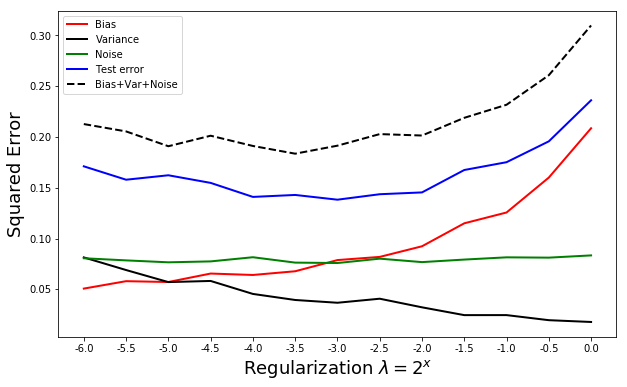

In [23]:
# plot results
plt.figure(figsize=(10,6))
plt.plot(lbias[:Nlambdas],c='r',linestyle='-',linewidth=2)
plt.plot(lvariance[:Nlambdas],c='k', linestyle='-',linewidth=2)
plt.plot(lnoise[:Nlambdas],c='g', linestyle='-',linewidth=2)
plt.plot(ltotal[:Nlambdas],c='b', linestyle='-',linewidth=2)
plt.plot(lsum[:Nlambdas],c='k', linestyle='--',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Regularization $\lambda=2^x$",fontsize=18);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(Nlambdas)],lmbdas);

Feel free to modify $\lambda$/$\sigma$ in these two files. If you want the approximation to be more accurate, increase <em>NMODELS</em> and/or <em>Nbig</em> (the more models you train, the better your approximation will be for $\mathbb{E}[h]$ and $\mathbb{E}[(h_D-\bar{h})^2]$). 
You can also play around with the variable <em>Nsmall</em> which regulates how big your actual training is supposed to be. 
</p>


<h3>Note</h3>
<p>
When computing the bias and variance, you approximate the results by training many $h_D$. We set <em>NMODELS</em>=1000 and use some thresholds to test if your functions' results are correct. Unfortunately, as a result of this randomness, there is still a small chance that you will fail some test cases, even though your implementations are correct. <br/><br/>
If you can pass all the tests most of the times locally, then you are fine. In this case, if the autograder says your accuracy is not 100%, just commit the code again.<br/><br/>

There is no competition this time.
</p>